In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings

import matplotlib as mpl
from matplotlib import colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm


from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import *
from function import *
from highlight_text import fig_text

theme = blackTheme

warnings.filterwarnings('ignore')

In [29]:
def main(ax, df, teamId, formationType, team_players_dict):
    df = df[df["teamId"]==teamId]
    df = df[(df['satisfiedEventsTypes'].apply(str).str.contains('passAccurate', na=False)) | 
            (df['eventId'].apply(str).str.contains('passInaccurate', na=False))]
    df["playerId"] = df["playerId"].astype("int")
    df.reset_index(inplace=True,drop=True)
    
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    
#     df['y']=80-(df['y'])
#     df['endY']=80-(df['endY'])
    df['length'] = np.sqrt(np.square(df["x"] - df["endX"]) + np.square(df["y"] - df["endY"]))
    df['angle'] = df[['x', 'y', 'endX', 'endY']].apply(get_angle, axis=1)
    df['angle_bin'] = pd.cut(df['angle'], bins=np.linspace(0, 2*np.pi, 25), right=True, labels=False)
    df = df.groupby(['playerId', 'angle_bin']).agg(count = ('angle_bin', 'count'), avg_length = ('length', 'mean'), sum_epv = ("EPV", "sum")).reset_index()
    plotPassSoner(ax, df, formationType, team_players_dict)

def plotPassSoner(ax, df, formationType, team_players_dict):
    posLoc = formations[formationType]
    playerPossitions = {}
    count = 0
    for key,val in team_players_dict.items():
        if val == "Sub":
            continue
        if not(isinstance(posLoc[val],list)):
            try:
                playerPossitions[key] = posLoc[val]
            except:
                pass
        else:
            try:
                playerPossitions[key] = posLoc[val][count]
                count+=1
                posLen = len(posLoc[val])
                if count == posLen:
                    count -= posLen
            except:
                pass

    for (playerId,playerName), (x,y) in playerPossitions.items():
        x = abs(x-1)
        playerDf = df[df['playerId']==playerId]
        plotInsetPassSoner(axes=ax, pdf=playerDf, x=y, y=x, name=playerName)
        # player_df = df.query("playerId == @player_id")
    
def plotInsetPassSoner(axes, pdf, x, y, name):
    pos = inset_axes(axes,width=1.5,height=3,loc=10,
                     bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0,
                     axes_class=get_projection_class("polar")) 
    try:
        first = name.split(" ")[0].title()
        second = name.split(" ")[1].title()
        name = first[0] + "." + second
        if name == "F.De":
            name = "FDJ"
    except:
        name = name
    pos.set_title(name,color=theme["textColor"],fontweight='bold',fontsize=12.8,fontproperties=monoBFont.prop)
    
    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#47BFFF","#BFFF47","#F05704"])
    colors = cmap(pdf['sum_epv']/pdf['sum_epv'].max())
    multiplier = 2*np.pi/24
    bars = pos.bar(pdf['angle_bin']*multiplier, 
                   pdf['count'], 
                   width=0.2, 
                   bottom=0, 
                   alpha=0.9, 
                   color=colors, 
                   zorder=3)
    
    pos.set_xticklabels([])
    pos.set_yticks([])
    pos.spines['polar'].set_visible(True)
    pos.spines['polar'].set_color(text_color)
    pos.spines['polar'].set_facecolor("#171733")
    pos.grid(True, alpha=1, color="white")
    pos.spines["polar"].set_alpha(.9)
    return pos

In [50]:
gw = input("gw ?")
season=2223
df = pd.read_csv(f"/work/assets/whoscored/barcelona/match/{season}/eventsData/new/{season}#{gw}.csv")

import pickle
with open(file=f"/work/assets/whoscored/barcelona/ids/{season}/{season}#{gw}.json",mode="rb") as file:
    players_dict = pickle.load(file)
players_dict["away"]
# function.main(ax,df, 65, "433", playersDict["home"])


gw ? cl2


{(80774, 'Marc-André ter Stegen'): 'GK',
 (301019, 'Jules Koundé'): 'DR',
 (130331, 'Andreas Christensen'): 'DC',
 (384711, 'Ronald Araújo'): 'DC',
 (84008, 'Marcos Alonso'): 'DL',
 (44721, 'Sergio Busquets'): 'MC',
 (402197, 'Pedri'): 'MC',
 (422937, 'Gavi'): 'MC',
 (300447, 'Raphinha'): 'FWR',
 (29400, 'Robert Lewandowski'): 'FW',
 (299513, 'Ousmane Dembélé'): 'FWL',
 (279423, 'Frenkie de Jong'): 'Sub',
 (349760, 'Ferran Torres'): 'Sub',
 (368091, 'Eric García'): 'Sub',
 (382234, 'Ansu Fati'): 'Sub',
 (277269, 'Franck Kessie'): 'Sub',
 (110154, 'Memphis Depay'): 'Sub',
 (44288, 'Jordi Alba'): 'Sub',
 (12712, 'Gerard Piqué'): 'Sub',
 (125211, 'Héctor Bellerín'): 'Sub',
 (367164, 'Iñaki Peña'): 'Sub',
 (422938, 'Alejandro Balde'): 'Sub',
 (396147, 'Arnau Tenas'): 'Sub'}

In [48]:
df = df[(df['satisfiedEventsTypes'].apply(str).str.contains('passAccurate', na=False)) | 
            (df['eventId'].apply(str).str.contains('passInaccurate', na=False))]
print(len(df[df["teamId"]!=65]))
print(len(df[df["teamId"]==65]))
print(len(df[df["playerId"]==44721]))
print(len(df[df["playerId"]==422937]))

444
386
43
23


In [51]:
df = df[(df['satisfiedEventsTypes'].apply(str).str.contains('passAccurate', na=False)) | 
            (df['eventId'].apply(str).str.contains('passInaccurate', na=False))]
print(len(df[df["teamId"]!=65]))
print(len(df[df["teamId"]==65]))
print(len(df[df["playerId"]==44721]))
print(len(df[df["playerId"]==422937]))

394
459
30
20


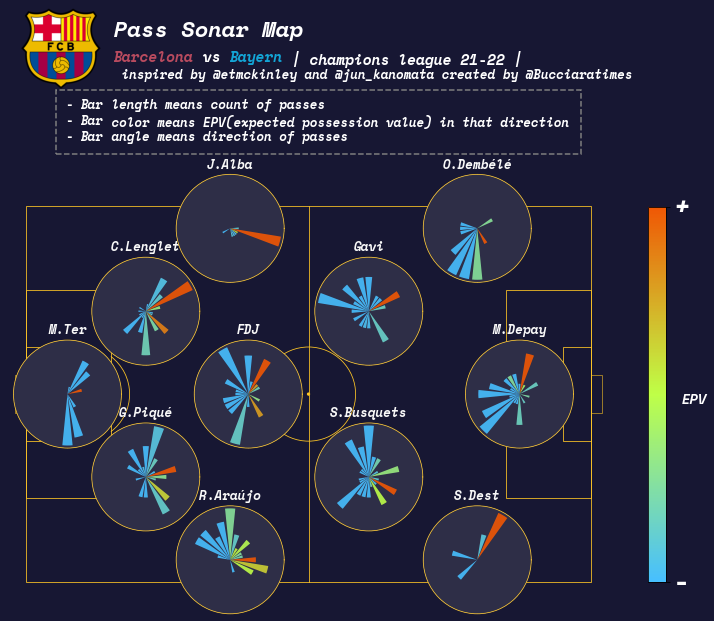

In [30]:
fig,ax = plt.subplots(figsize=(13.5,11.5))
fig_color = "#171733"
text_color = "#fdc526"
fig.set_facecolor(fig_color)


pitch = Pitch(pitch_type='statsbomb',
              goal_type="box",
              pitch_color=fig_color,
              line_color=text_color,
              line_zorder=2,
              linewidth=.8,
              constrained_layout=True,
              tight_layout=True,
#               pad_top=0, pad_bottom=0
             )
pitch.draw(ax=ax)
# ax.invert_xaxis()
image = Image.open('/work/assets/image/barcelona_small2.png')
ax_image = fig.add_axes((0.13, .87, 0.1, 0.1))
ax_image.axis('off')
ax_image.imshow(image)

teamName = "Barcelona"
opponent = df.loc[0,"opponent"]

fig_text(s=f"<Pass Sonar Map>",
         x=ax.get_position().x0+.11,y=ax.get_position().y0+.74,
         color=theme["textColor"],
         highlight_colors=["white"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<{teamName.title()}> vs <{opponent.title()}> | champions league 21-22 |",
         x=ax.get_position().x0+.11,y=ax.get_position().y0+.71,
         color="white",
         highlight_colors=[theme["homeColor"],theme["awayColor"]],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14.5,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(x=ax.get_position().x0+.06,y=ax.get_position().y0+.615,
         s=f"- <Bar> length means count of passes\n\
- <Bar> color means EPV(expected possession value) in that direction\n\
- <Bar> angle means direction of passes",
 
         color="white",
         highlight_colors=["white"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=12.5,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(x=ax.get_position().x0+.11,y=ax.get_position().y0+.69,
         s=f" inspired by @etmckinley and @jun_kanomata created by @Bucciaratimes",
         color="white",
#          highlight_colors=[theme["textColor"]],
#          highlight_weights=["bold"],
#          highlight_styles=["italic"],
         fontsize=12.5,
         fontproperties=monoBFont.prop,fig=fig)

cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#47BFFF","#BFFF47","#F05704"])
colorBar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1, clip=False), cmap=cmap),
             location="right",orientation='vertical',anchor=(0,.5), shrink=.6, ticks=[0, 1], ax=ax)

colorBar.ax.set_yticklabels(["-","+"],fontdict={"color":"white","fontsize":28,"fontproperties":monoBFont.prop})
colorBar.ax.set_ylabel('EPV', color='white', fontdict={"color":"white","fontsize":14,"fontproperties":monoBFont.prop}, rotation=0)
fig.patches.extend([
    plt.Rectangle(
        (ax.get_position().x0+.05,ax.get_position().y0+.54),.54,.078,fill=False, alpha=1,
        linestyle="--", edgecolor="gray", linewidth=1.5, zorder=99,
        transform=fig.transFigure, figure=fig
    )
])
main(ax,df,65,"433",players_dict["away"])
plt.savefig(f'/work/sonner{gw}.png', dpi=300, bbox_inches="tight",facecolor='#171733')

[[Text(0.17643939393939398, 0.8982037037037037, 'Champions League 22-23 | Created by:@Bucciaratimes')]]

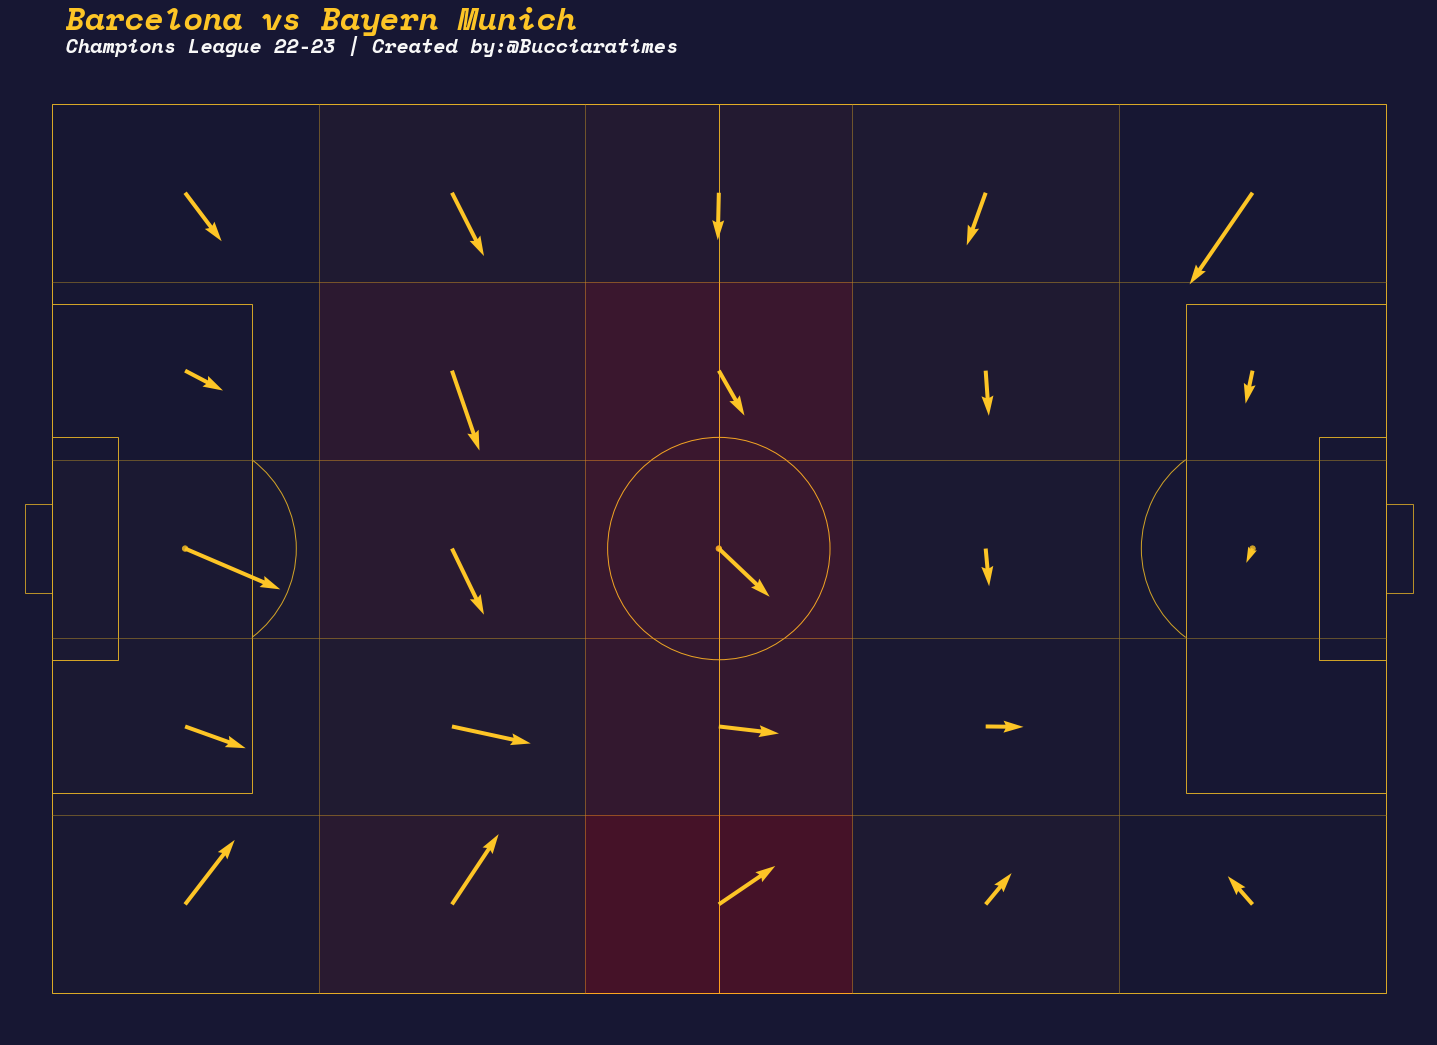

In [80]:
# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axes = plt.subplots(figsize=(27,18))

fig_color = "#171733"
fig.set_facecolor(fig_color)
pitch = Pitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = fig_color,
    line_color = "#fdc526", 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=1.0
)
pitch.draw(ax=axes)
# axes.invert_yaxis()

df = pd.read_csv("/work/assets/whoscored/barcelona/match/2223/eventsData/new/2223#cl1.csv")
df = df[df["teamId"]==65]
df_pass = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]

bins = (5, 5)
stats = pitch.bin_statistic(df_pass["x"], df_pass["y"], 
                                statistic='count', bins=bins,
                                normalize=True)

cmapA = LinearSegmentedColormap.from_list("my_cmap", ["#171733","#442D2D", "#852626", "#CB1C1C", "#FF0000"], N=100)
pitch.heatmap(stats, edgecolors='#fdc526',cmap=cmapA,ax=axes,alpha=.2)

# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.endX, df_pass.endY,
                color='#fdc526', arrow_type='scale',
                arrow_length=10, bins=bins, ax=axes)

team = "Barcelona"
fig_text(s=f"<{team} vs Bayern Munich>",
         x=axes.get_position().x0+.03,y=axes.get_position().y1+.018,
         color="#ffffff",
         highlight_colors=["#fdc526"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=32, 
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"Champions League 22-23 | Created by:@Bucciaratimes",
         x=axes.get_position().x0+.03,y=axes.get_position().y1+.002,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=20,
         fontproperties=monoBFont.prop,fig=fig)


[[Text(0.17643939393939398, 0.8982037037037037, 'Champions League 21-22 | Created by:@Bucciaratimes')]]

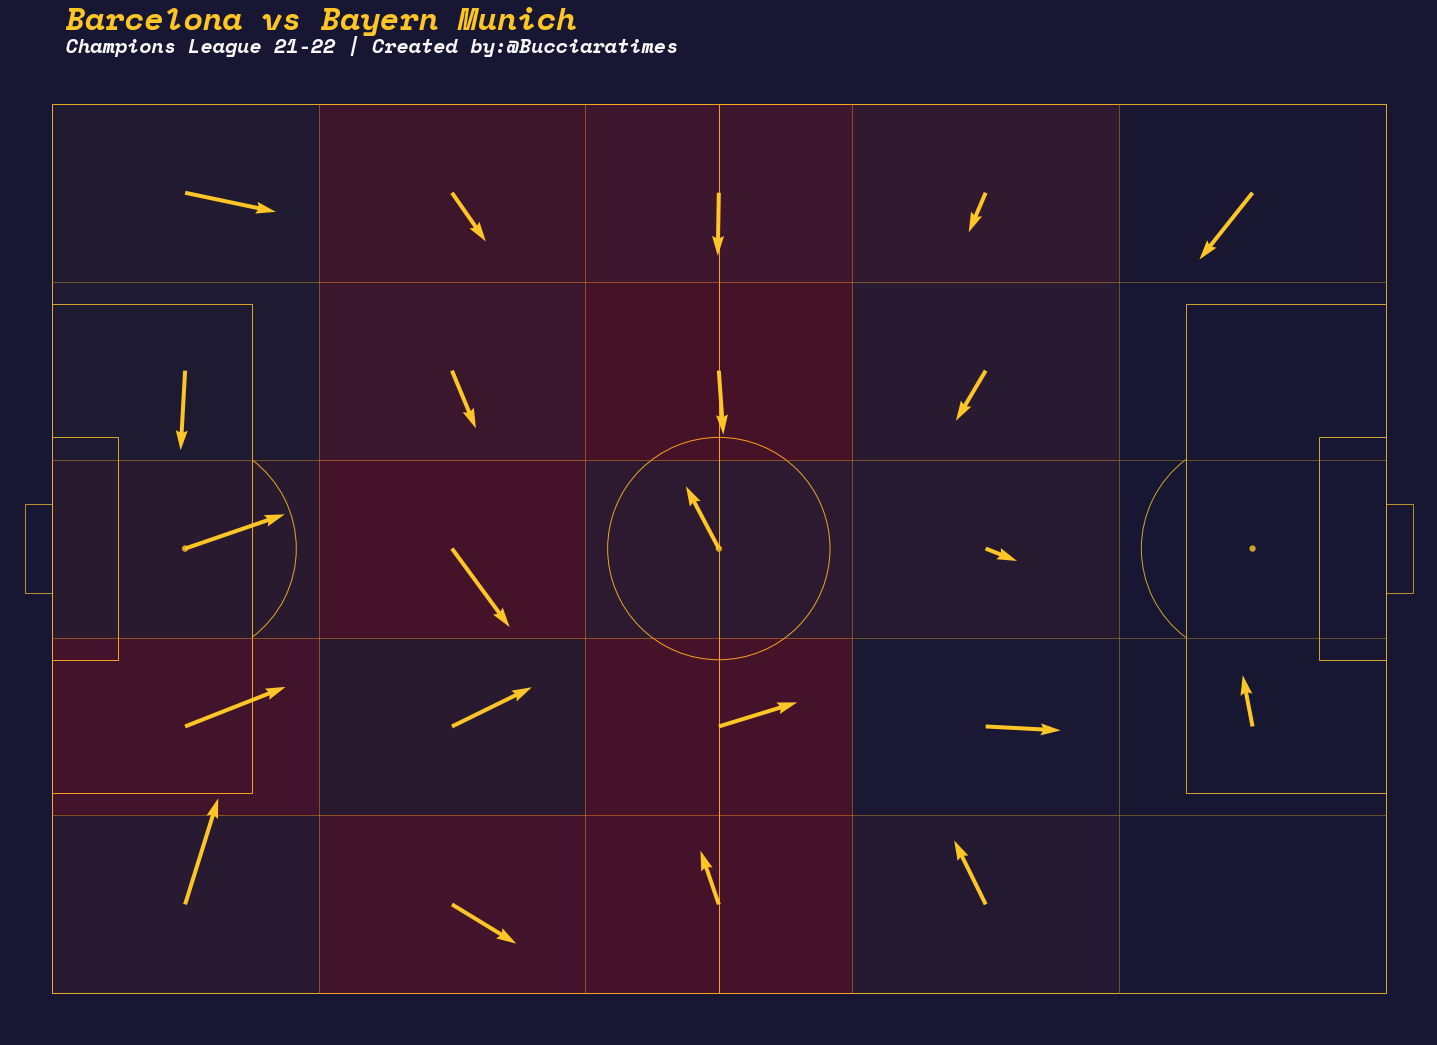

In [82]:
# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axes = plt.subplots(figsize=(27,18))

fig_color = "#171733"
fig.set_facecolor(fig_color)
pitch = Pitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = fig_color,
    line_color = "#fdc526", 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=1.0
)
pitch.draw(ax=axes)
# axes.invert_yaxis()

df = pd.read_csv("/work/assets/whoscored/barcelona/match/2122/eventsData/new/2122#cl_bayernA.csv")
df = df[df["teamId"]==65]
df_pass = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]

bins = (5, 5)
stats = pitch.bin_statistic(df_pass["x"], df_pass["y"], 
                                statistic='count', bins=bins,
                                normalize=True)

cmapA = LinearSegmentedColormap.from_list("my_cmap", ["#171733","#442D2D", "#852626", "#CB1C1C", "#FF0000"], N=100)
pitch.heatmap(stats, edgecolors='#fdc526',cmap=cmapA,ax=axes,alpha=.2)

# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.endX, df_pass.endY,
                color='#fdc526', arrow_type='scale',
                arrow_length=10, bins=bins, ax=axes)

fig_text(s=f"<{team} vs Bayern Munich>",
         x=axes.get_position().x0+.03,y=axes.get_position().y1+.018,
         color="#ffffff",
         highlight_colors=["#fdc526"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=32, 
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"Champions League 21-22 | Created by:@Bucciaratimes",
         x=axes.get_position().x0+.03,y=axes.get_position().y1+.002,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=20,
         fontproperties=monoBFont.prop,fig=fig)
